[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/4vel/python-intro/blob/main/Hometask/Task3_dmrf_OOP.ipynb)

# Задание

* Реализовать в ООП - формате задания 1 и 2

### Справочно:
Задание 1
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить ее в pandas dataframe
* Cохранить pandas dataframe в pickle
* Cохранить pandas dataframe в excel
* Cохранить pandas dataframe в БД

Задание 2
* Используя данные об объектах недвижимости на сайте “наш.дом.рф” или cian.ru, провести мини-исследование рынка строящейся/готовой недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
<b> Идеи для мини-исследования </b>
* Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
* Рассчитать объемы вводимого жилья по регионам и по годам.
* Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах.
* Визуализировать разброс, связь, доли, распределение этих показателей по регионам.
* Сделать выводы по каждому из расчетов и графиков


Т.к. выгрузка из наш.дом.рф не работает сделал выгрузку из Циан см. ниже, чтобы выполнить все задания делаю через приложенную выгрузку

In [1]:
import pandas as pd
import cianparser
from pylab import rcParams
import seaborn as sns
#import plotly.express as px
import numpy as np

import sqlite3
import requests
import datetime as dt

In [2]:

class Reader:
    '''Импортируем данные'''
    def __init__(self, filename):
        self.filename = filename
        self.df = None

    def get_pkl(self):
        self.df = pd.read_pickle(self.filename)
        return self.df
    
    def get_cian(self):
        moscow_parser = cianparser.CianParser(location="Москва")
        data = moscow_parser.get_flats(deal_type="sale", rooms=(1, 2), with_saving_csv=True, additional_settings={"start_page":1, "end_page":20})
        self.df = pd.DataFrame(data)
        return self.df

In [8]:
df_cian = Reader(None)
df_cian.get_cian().head(2)


                              Preparing to collect information from pages..
The absolute path to the file: 
c:\Users\AVV\Documents\Programming\Python\Teach\School_DS\code\teach-scool-ds\Hometask\cian_flat_sale_1_20_moskva_12_Jul_2024_18_36_07_481247.csv 

The page from which the collection of information begins: 
 https://cian.ru/cat.php?engine_version=2&p=1&with_neighbors=0&region=1&deal_type=sale&offer_type=flat&room1=1&room2=1

 1 | 1 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 28. Progress ratio: 5 %. Average price: 246 719 010 rub
 2 | 2 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 56. Progress ratio: 10 %. Average price: 269 247 729 rub
 3 | 3 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 84. Progress ratio: 15 %. Average price: 286 339 333 rub
 4 | 4 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,district,street,house_number,underground,residential_complex
0,VESPER,developer,https://www.cian.ru/sale/flat/262519758/,Москва,sale,flat,5,21,2,110.6,103787040.0,Пресненский,Костикова,4к1,Улица 1905 года,Lucky
1,ID 108172779,real_estate_agent,https://www.cian.ru/sale/flat/301496936/,Москва,sale,flat,7,8,1,53.2,58786000.0,Таганский,Славянская площадь,2/5с1,Китай-город,LUMIN


In [3]:
df_my = Reader('df_nashdomrf.pkl')
df_dl =df_my.get_pkl()
df_dl.head(2)

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,...,metro.time,metro.isWalk,metro.colors,complexShortNm,airQualityIndexValue,greenAreaIndexValue,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
0,13399,34754,28141,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13397,37201,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
class Saver:
    '''Сохраняем в различные форматы'''
    def __init__(self,filename, data):
        self.filename = filename
        self.data = data

    def save_exel(self):
        ext_filename = f'{self.filename}.xlsx'
        self.data.to_excel(ext_filename)

    def save_pkl(self):
        ext_filename = f'{self.filename}.pkl'
        self.data.to_pickle(ext_filename)

    def save_db(self):
        df = self.data.astype(str)
        conn = sqlite3.connect('test_database')
        df.to_sql('products', conn, if_exists='replace', index = False)
        conn.commit()
        conn.close()  
        

In [5]:
saver = Saver('my_data',df_dl)
saver.save_exel()
saver.save_pkl()
saver.save_db()

In [5]:
class Plotter:
    '''Построение графиков'''
    def __init__(self, data, group_data):
        self.data = data
        self.group_data = group_data
    
    def plot_bar1(self):
        import matplotlib.pyplot as plt
        rcParams['figure.figsize'] = 9,12
        self.data.sort_values(ascending=False).plot(kind='barh')
        plt.show()
    
    def plot_bar2(self):
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10,6))
        for region in self.group_data['developer.regRegionDesc'].unique():
            self.data = self.group_data[self.group_data['developer.regRegionDesc'] == region]
            plt.plot(self.data['objTransferPlanDt'], self.data['totalLivingCnt'], label=region)

        plt.xlabel('Год')
        plt.ylabel('Объем вводимого жилья')
        plt.title('Объемы вводимого жилья по регионам и по годам')
        plt.legend()
        plt.show()

    def plot_bar3(self):
        import matplotlib.pyplot as plt
        rcParams['figure.figsize'] = 9,12
        self.data.plot(kind='barh')
        plt.show()

class PlotterRound:
    '''Построение круговых диаграмм'''
    def __init__(self, data ,limit ,values, names, title):
        self.data = data
        self.limit = limit
        self.values = values
        self.names = names
        self.title = title
    
    def round_px(self):
        import plotly.express as px
        self.data.loc[self.data[self.values] < self.limit, 'developer.regRegionDesc'] = 'Другие регионы' 
        fig = px.pie(self.data, values = self.values, names = self.names, title = self.title)
        fig.show()
    
    # def pr(self):
    #     print(f'self.data = {self.data}')
    #     print(f'self.values = {self.values}')
    #     print(f'self.names = {self.names}')
    #     print(f'self.titl = {self.titl}')




In [6]:
df = df_dl [['region', 'developer.regRegionDesc'  , 'objPriceAvg', 'objElemLivingCnt']]
df.head(2)

,region,developer.regRegionDesc,objPriceAvg,objElemLivingCnt
0,72,Тюменская область,50768.0,0
1,72,Тюменская область,47163.0,65


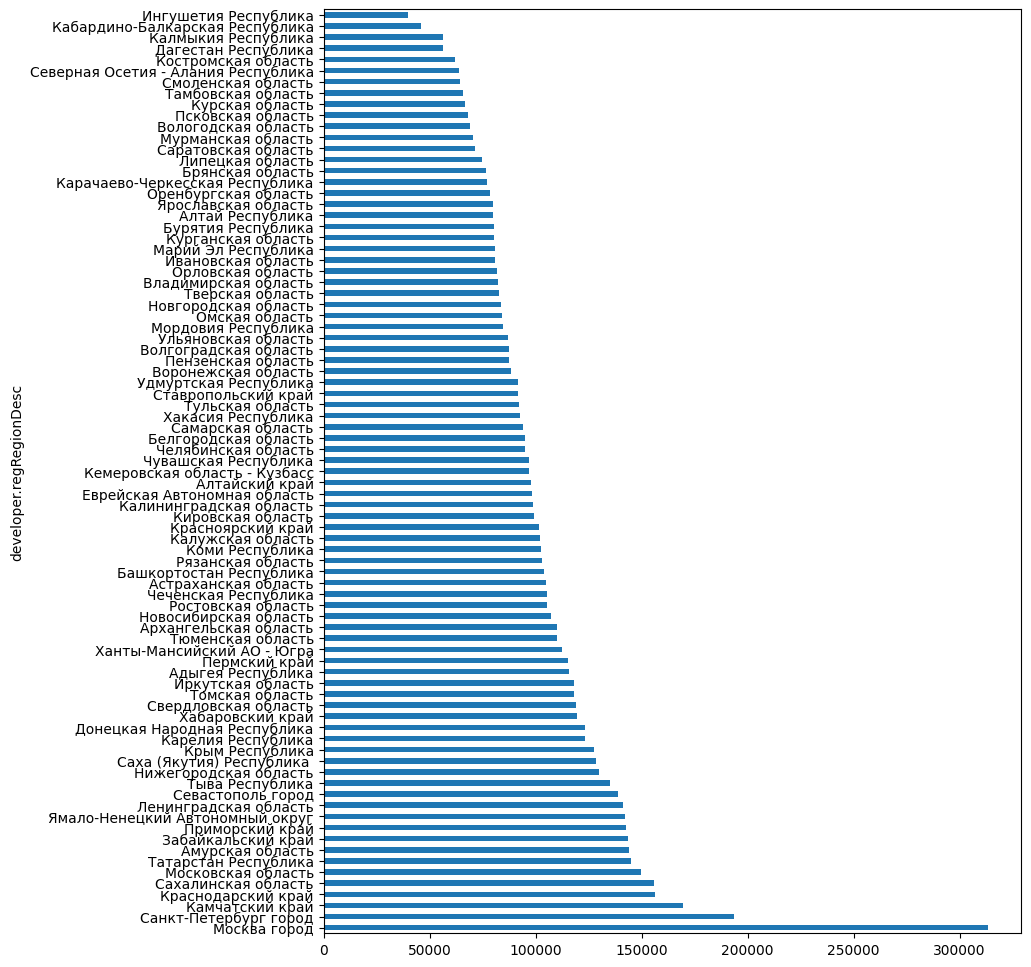

In [7]:
df.dropna (subset=['objPriceAvg', 'objElemLivingCnt'])
df = df[(df.objElemLivingCnt > 0) & (df.objPriceAvg > 0)]
average_prices = df.groupby('developer.regRegionDesc')['objPriceAvg'].mean()
plt = Plotter(average_prices, None)
plt.plot_bar1()

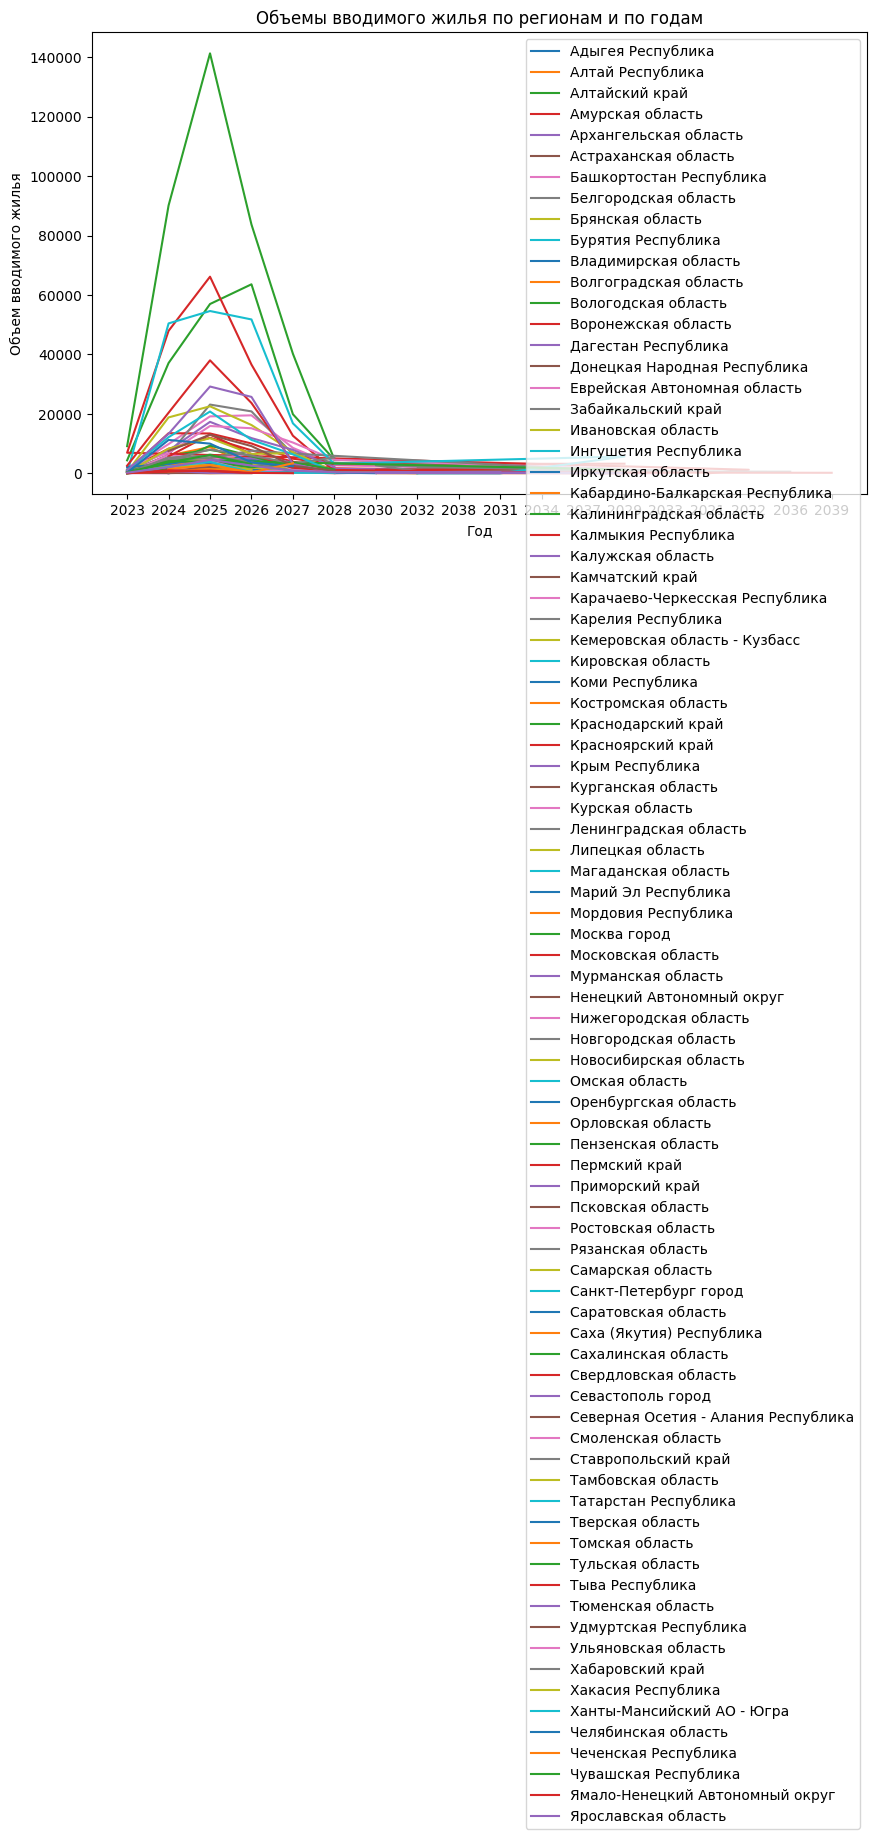

In [8]:
df2 = df_dl.dropna (subset=['objTransferPlanDt'])
df2 = df2[['region', 'developer.regRegionDesc', 'objTransferPlanDt', 'objElemLivingCnt' ]]
df2['objTransferPlanDt'] = pd.to_datetime(df2['objTransferPlanDt'], format='%d-%m-%Y %H:%M')
df2['objTransferPlanDt'] = df2['objTransferPlanDt'].dt.year.astype(str)
df2 = df2.groupby(['developer.regRegionDesc', 'objTransferPlanDt'])['objElemLivingCnt'].sum().reset_index()
df2.rename(columns={'objElemLivingCnt': 'totalLivingCnt'}, inplace=True)
df_grouped = df2.groupby(['developer.regRegionDesc', 'objTransferPlanDt'])['totalLivingCnt'].mean().reset_index()
df_grouped.sort_values(by=['totalLivingCnt', 'developer.regRegionDesc'], ascending=[False, True])
plt2 = Plotter(df2, df_grouped)
plt2.plot_bar2()

In [9]:
df3 = df_dl
df3['totalPrice'] = df3['objPriceAvg'] * df3['objElemLivingCnt']
df3 = df3[['region', 'developer.regRegionDesc', 'objPriceAvg', 'objFloorCnt'
                , 'objFlatCnt', 'objElemParkingCnt', 'objElemLivingCnt', 'totalPrice']]

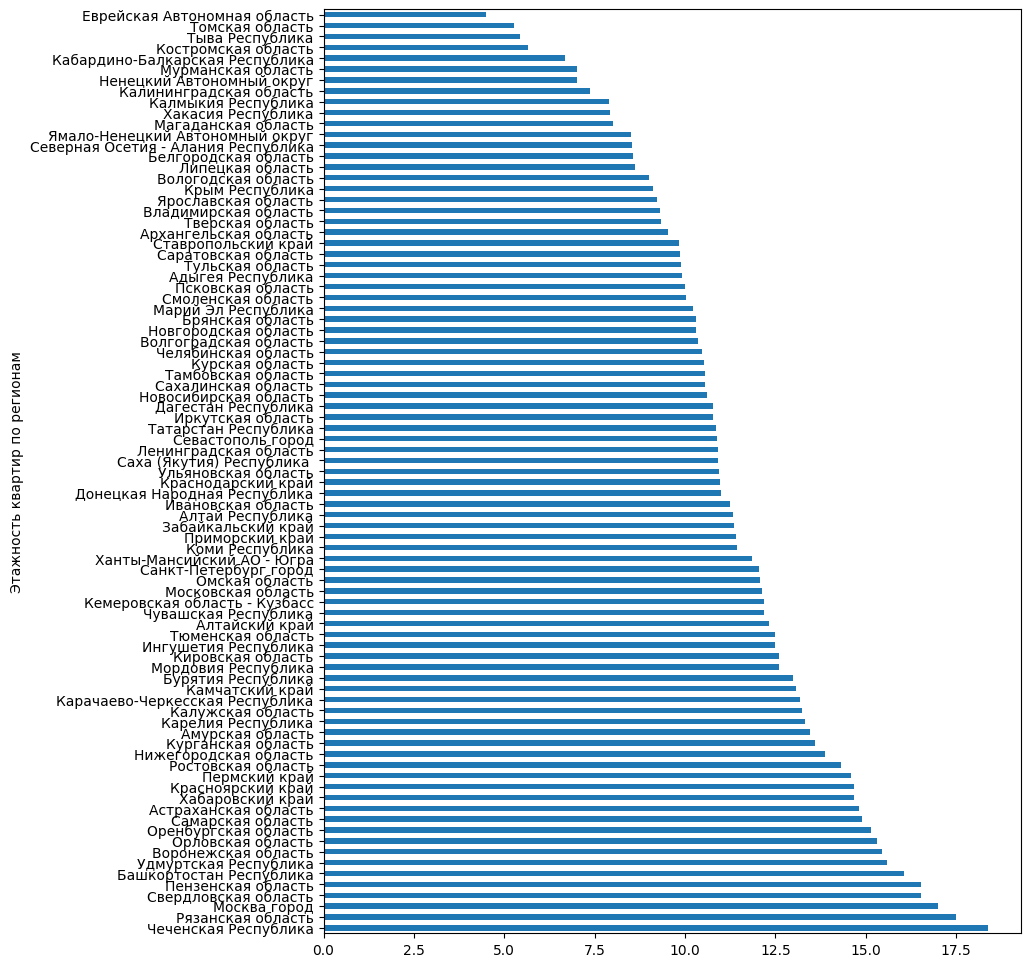

In [10]:
grouped_floor = df3.groupby(['developer.regRegionDesc'])['objFloorCnt'].mean()
grouped_floor.index.name = "Этажность квартир по регионам"

plt_floor = Plotter(grouped_floor, None)
plt_floor.plot_bar1()


In [11]:
grouped_flat = df3.groupby('developer.regRegionDesc').agg({'objFlatCnt' : 'sum'}).reset_index()
#grouped_flat.loc[grouped_flat['objFlatCnt'] < 20000, 'developer.regRegionDesc'] = 'Другие регионы'
plt_flat = PlotterRound(grouped_flat, 20000, 'objFlatCnt', 'developer.regRegionDesc', 'Доли продаваемых квартир по регионам')
plt_flat.round_px()

In [12]:
grouped_living = df3.groupby('developer.regRegionDesc').agg({'objElemLivingCnt' : 'sum'}).reset_index()
plt_living = PlotterRound(grouped_living, 15000, 'objElemLivingCnt', 'developer.regRegionDesc', 'Доли площадей продаваемых квартир по регионам')
plt_living.round_px()

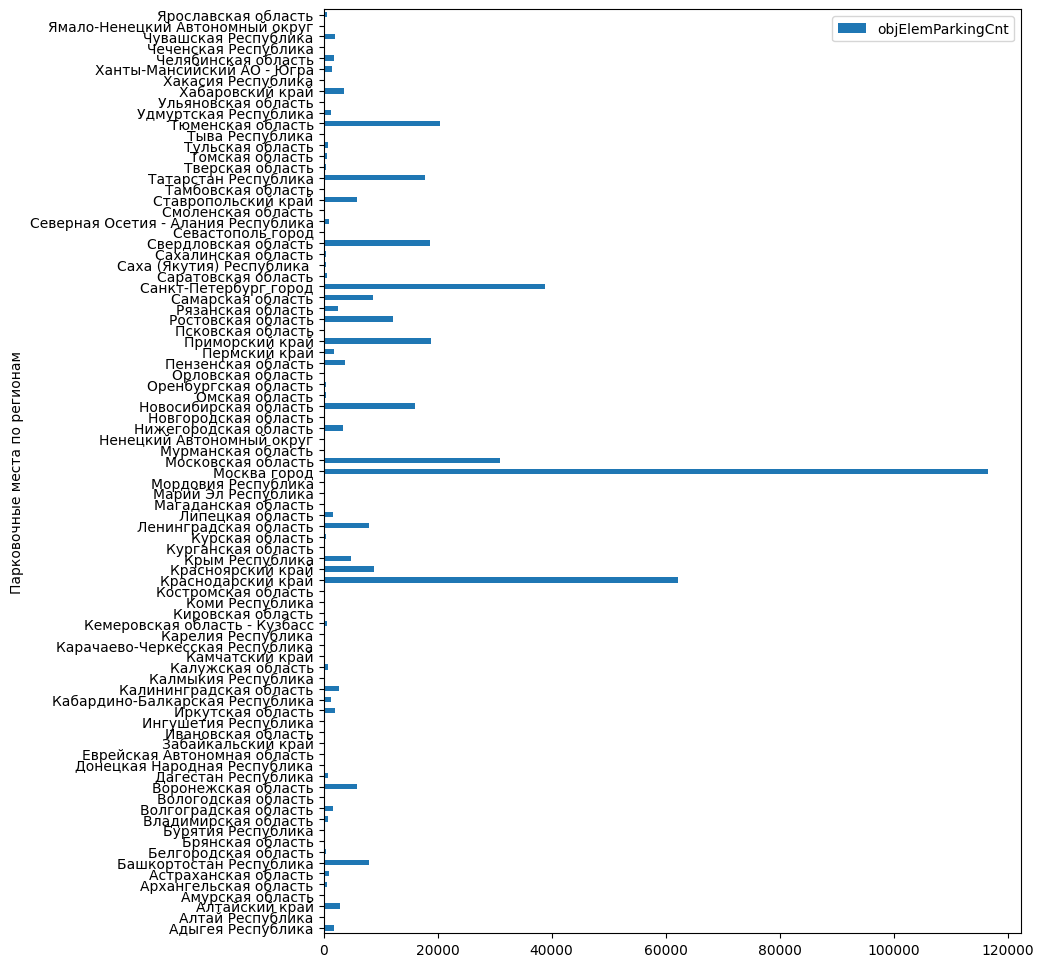

In [13]:
grouped_parking = df3.groupby('developer.regRegionDesc').agg({'objElemParkingCnt' : 'sum'})
grouped_parking.index.name = "Парковочные места по регионам"
plt_parkin = Plotter(grouped_parking, None)
plt_parkin.plot_bar3()

In [14]:
grouped_price = df3.groupby('developer.regRegionDesc').agg({'totalPrice' : 'sum'}).reset_index()
plt_price = PlotterRound(grouped_price, 2.e9, 'totalPrice', 'developer.regRegionDesc', 'Доли объёмов продаж по регионам')
plt_price.round_px()